# 🎯 Time Series Forecasting - FINAL COMPARISON

**Team:**
- Амел Махмутовиќ (203100)
- Христина Степаноска (183007)  
- Михаела Николовска (183014)

---

This notebook loads results from 3 dataset analyses and compares them.

## 📦 Section 1: Install & Import

In [ ]:
!pip install -q seaborn scipy

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")

print("✅ All packages imported!")

✅ All packages imported!


## 🔧 Section 2: Helper Functions

In [ ]:
def normalize_metrics(df, metrics=['RMSE', 'MAE', 'MAPE']):
    """Normalize metrics to 0-1 scale per dataset"""
    df_norm = df.copy()
    for metric in metrics:
        df_norm[f'{metric}_norm'] = df.groupby('dataset')[metric].transform(
            lambda x: (x - x.min()) / (x.max() - x.min()) if x.max() != x.min() else 0
        )
    return df_norm

def calculate_improvement(current_mape, baseline_mape):
    if baseline_mape == 0:
        return np.nan
    return round(((baseline_mape - current_mape) / baseline_mape) * 100, 2)

def plot_heatmap(df, title="Model Performance"):
    pivot = df.pivot_table(index='model', columns='dataset', values='avg_score')
    plt.figure(figsize=(10, 8))
    sns.heatmap(pivot, annot=True, cmap='RdYlGn_r', fmt='.3f',
                cbar_kws={'label': 'Error (Lower=Better)'}, vmin=0, vmax=1)
    plt.title(title, fontsize=14, fontweight='bold')
    plt.xlabel('Dataset', fontsize=12)
    plt.ylabel('Model', fontsize=12)
    plt.tight_layout()
    return plt.gcf()

def plot_ranking_lines(rank_pivot):
    plt.figure(figsize=(12, 6))
    datasets = [col for col in rank_pivot.columns if col != 'rank_variance']
    for model in rank_pivot.index:
        ranks = rank_pivot.loc[model, datasets]
        plt.plot(datasets, ranks, marker='o', label=model, linewidth=2, markersize=8)
    plt.xlabel('Dataset', fontsize=12)
    plt.ylabel('Rank (1=Best)', fontsize=12)
    plt.title('Model Rankings Across Datasets', fontsize=14, fontweight='bold')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.gca().invert_yaxis()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    return plt.gcf()

def plot_improvement_bars(comparison_df):
    pivot = comparison_df.pivot(index='model', columns='dataset', values='improvement_%')
    fig, ax = plt.subplots(figsize=(12, 8))
    pivot.plot(kind='barh', ax=ax, width=0.8)
    ax.set_xlabel('Improvement over Baseline (%)', fontsize=12)
    ax.set_ylabel('Model', fontsize=12)
    ax.set_title('Improvements Over Naive Forecast', fontsize=14, fontweight='bold')
    ax.axvline(x=0, color='black', linestyle='--', linewidth=1)
    ax.legend(title='Dataset', bbox_to_anchor=(1.05, 1), loc='upper left')
    ax.grid(True, alpha=0.3)
    plt.tight_layout()
    return fig

def plot_family_boxplots(df):
    fig, axes = plt.subplots(1, 3, figsize=(16, 5))
    for i, metric in enumerate(['RMSE_norm', 'MAE_norm', 'MAPE_norm']):
        sns.boxplot(data=df, x='family', y=metric, ax=axes[i])
        axes[i].set_title(f'{metric.replace("_norm", "")} by Family', fontsize=12, fontweight='bold')
        axes[i].set_xlabel('Model Family', fontsize=11)
        axes[i].set_ylabel(f'Normalized {metric.replace("_norm", "")}', fontsize=11)
        axes[i].tick_params(axis='x', rotation=45)
    plt.tight_layout()
    return fig

print("✅ Helper functions loaded!")

✅ Helper functions loaded!


## 📊 Section 3: Load Results



In [4]:
from google.colab import files

print("📁 Please upload these 3 files:")
print("  - air_passengers_metrics.csv")
print("  - rossmann_metrics.csv")
print("  - energy_metrics.csv")
print()

uploaded = files.upload()

air_results = pd.read_csv('air_passengers_metrics.csv')
rossmann_results = pd.read_csv('rossmann_metrics.csv')
# energy_results = pd.read_csv('energy_metrics.csv')

print("\n✅ All files loaded!")

📁 Please upload these 3 files:
  - air_passengers_metrics.csv
  - rossmann_metrics.csv
  - energy_metrics.csv



Saving rossmann_metrics.csv to rossmann_metrics.csv
Saving air_passengers_metrics.csv to air_passengers_metrics (1).csv

✅ All files loaded!


## 📊 Section 4: Combine Results

In [5]:
# Combine only the 2 datasets you have
all_results = pd.concat([
    air_results.assign(dataset='Air Passengers'),
    rossmann_results.assign(dataset='Rossmann'),
    # energy_results.assign(dataset='Energy')  # Comment out for now
], ignore_index=True)

print("📊 Combined Results (2 datasets):")
all_results

📊 Combined Results (2 datasets):


,model,RMSE,MAE,MAPE,dataset
0,Naive,9.313394e+01,8.144828e+01,20.200133,Air Passengers
1,Moving Average,7.885289e+01,6.234483e+01,13.924050,Air Passengers
2,XGBoost,5.218989e+01,4.055124e+01,8.321165,Air Passengers
3,Naive,4.012268e+06,2.512012e+06,299.610317,Rossmann
4,Moving Average,2.887851e+06,1.975401e+06,318.005316,Rossmann
5,Prophet,1.287977e+06,9.748498e+05,14.765638,Rossmann
6,Random Forest,8.589571e+05,5.601488e+05,8.648143,Rossmann


## 🔍 Section 5: Research Question 1
### Which models perform best ACROSS datasets?

In [6]:
avg_performance = all_results.groupby('model')[['RMSE', 'MAE', 'MAPE']].mean()
avg_performance = avg_performance.sort_values('MAPE')

print("📈 Average Performance (Lower = Better):")
avg_performance

📈 Average Performance (Lower = Better):


,RMSE,MAE,MAPE
model,,,
XGBoost,5.218989e+01,4.055124e+01,8.321165
Random Forest,8.589571e+05,5.601488e+05,8.648143
Prophet,1.287977e+06,9.748498e+05,14.765638
Naive,2.006180e+06,1.256047e+06,159.905225
Moving Average,1.443965e+06,9.877318e+05,165.964683


In [7]:
all_results_norm = normalize_metrics(all_results)
all_results_norm['avg_score'] = all_results_norm[['RMSE_norm', 'MAE_norm', 'MAPE_norm']].mean(axis=1)

best_per_dataset = all_results_norm.loc[all_results_norm.groupby('dataset')['avg_score'].idxmin()]
print("🏆 Best Model per Dataset:")
best_per_dataset[['dataset', 'model', 'MAPE', 'avg_score']]

🏆 Best Model per Dataset:


,dataset,model,MAPE,avg_score
2,Air Passengers,XGBoost,8.321165,0.0
6,Rossmann,Random Forest,8.648143,0.0


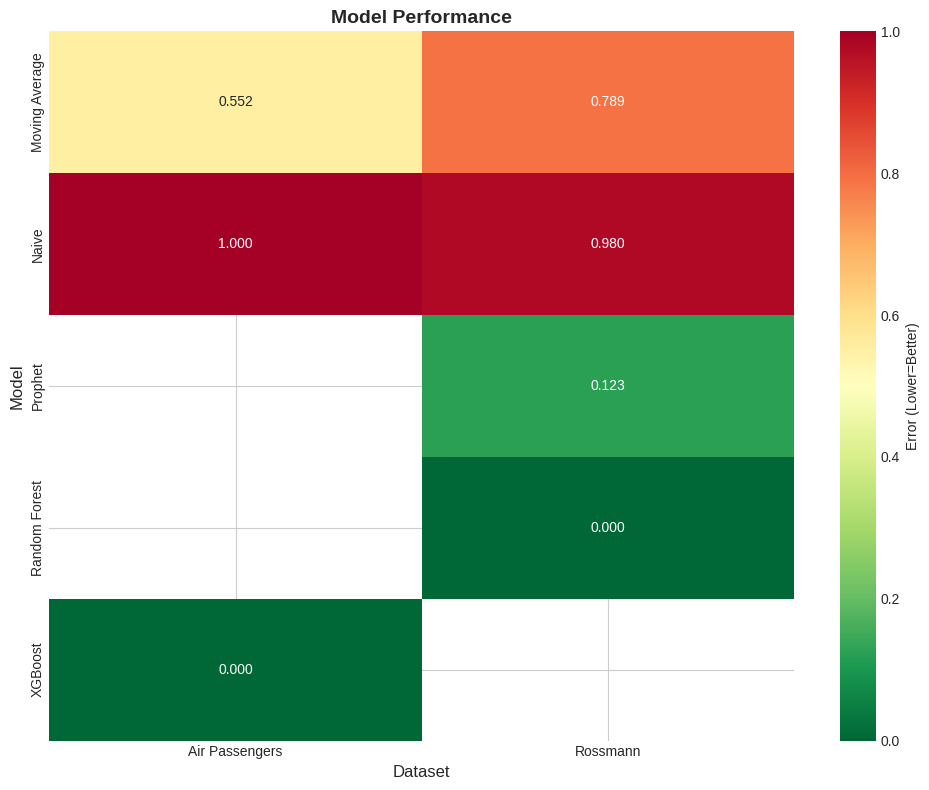

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

💾 Downloaded: heatmap.png


In [8]:
fig = plot_heatmap(all_results_norm)
plt.show()

from google.colab import files
fig.savefig('heatmap.png', dpi=300, bbox_inches='tight')
files.download('heatmap.png')
print("💾 Downloaded: heatmap.png")

## 🤖 Section 6: Research Question 2
### Which MODEL FAMILY works best?

In [9]:
model_families = {
    'Naive': 'Statistical',
    'ARIMA': 'Statistical',
    'SARIMAX': 'Statistical',
    'Prophet': 'Statistical',
    'Random Forest': 'Tree-based',
    'XGBoost': 'Tree-based',
    'LightGBM': 'Tree-based',
    'LSTM': 'Deep Learning'
}

all_results['family'] = all_results['model'].map(model_families)
all_results_norm['family'] = all_results_norm['model'].map(model_families)

family_performance = all_results.groupby('family')[['RMSE', 'MAE', 'MAPE']].mean().sort_values('MAPE')
print("📊 Performance by Family:")
family_performance

📊 Performance by Family:


,RMSE,MAE,MAPE
family,,,
Tree-based,4.295046e+05,2.800947e+05,8.484654
Statistical,1.766779e+06,1.162314e+06,111.525363


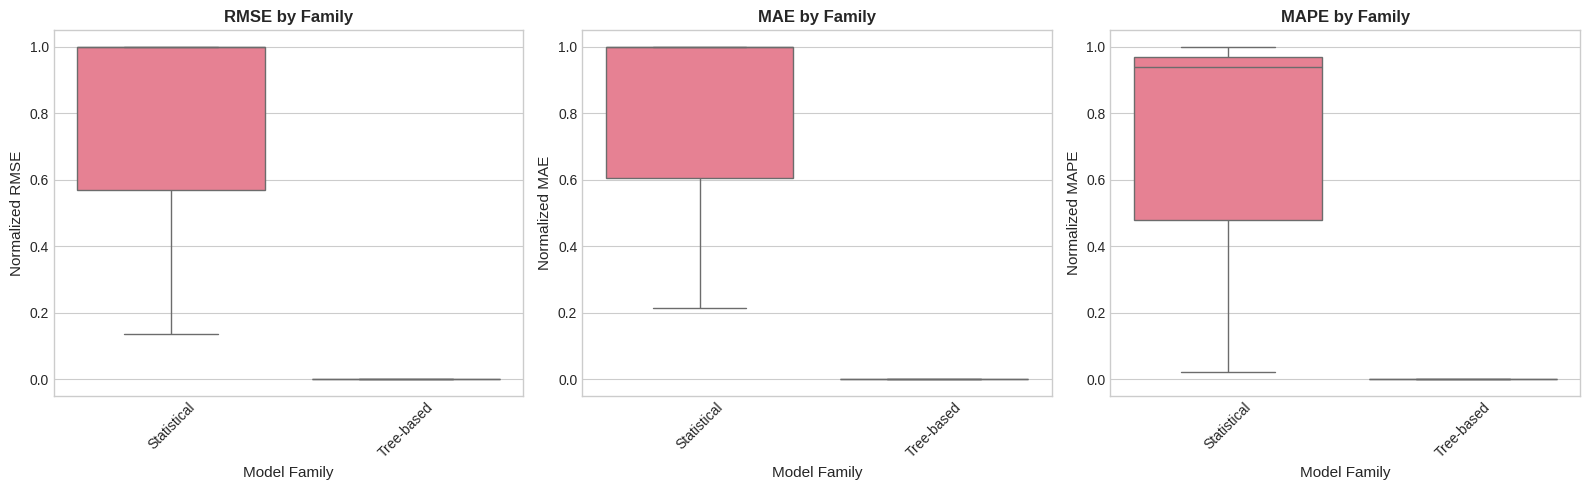

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

💾 Downloaded: family_comparison.png


In [10]:
fig = plot_family_boxplots(all_results_norm)
plt.show()
fig.savefig('family_comparison.png', dpi=300, bbox_inches='tight')
files.download('family_comparison.png')
print("💾 Downloaded: family_comparison.png")

## 📈 Section 7: Research Question 3
### How do dataset characteristics affect models?

In [11]:
all_results['rank'] = all_results.groupby('dataset')['MAPE'].rank(method='min')
rank_pivot = all_results.pivot_table(index='model', columns='dataset', values='rank')
rank_pivot['rank_variance'] = rank_pivot.var(axis=1)
rank_pivot = rank_pivot.sort_values('rank_variance')

print("🎯 Model Rankings (1=Best):")
rank_pivot

🎯 Model Rankings (1=Best):


dataset,Air Passengers,Rossmann,rank_variance
model,,,
Naive,3.0,3.0,0.0
Moving Average,2.0,4.0,2.0
Prophet,NaN,2.0,NaN
Random Forest,NaN,1.0,NaN
XGBoost,1.0,NaN,NaN


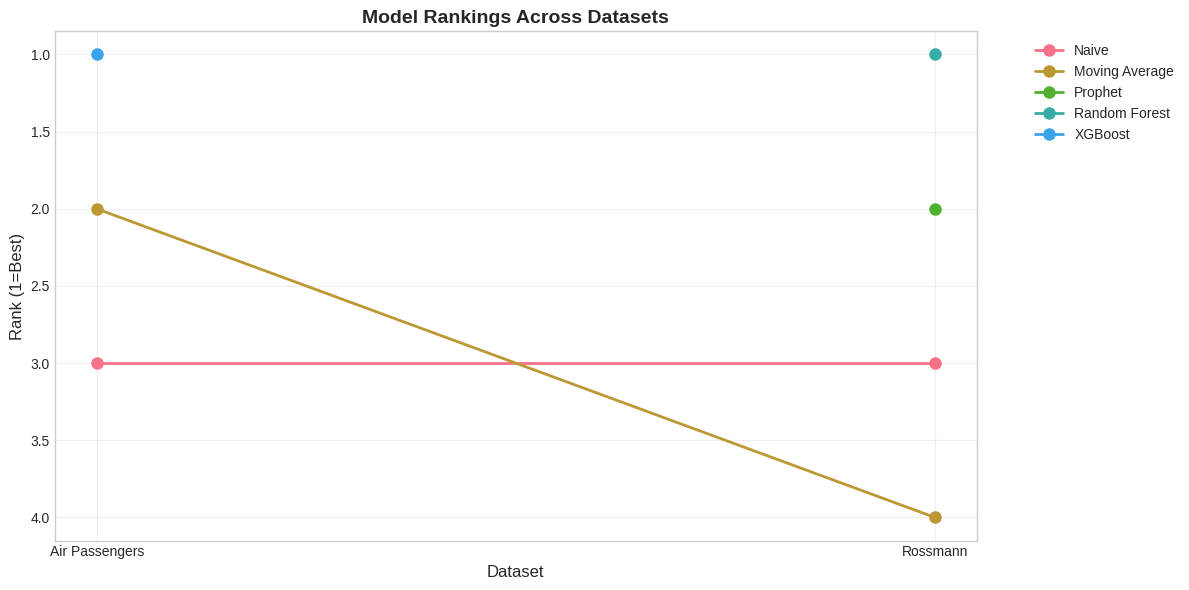

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

💾 Downloaded: ranking_changes.png


In [12]:
fig = plot_ranking_lines(rank_pivot)
plt.show()
fig.savefig('ranking_changes.png', dpi=300, bbox_inches='tight')
files.download('ranking_changes.png')
print("💾 Downloaded: ranking_changes.png")

## 🎯 Section 8: Research Question 4
### Do complex models beat baselines?

In [13]:
baseline = all_results[all_results['model'] == 'Naive'][['dataset', 'MAPE']].rename(columns={'MAPE': 'baseline_MAPE'})
comparison = all_results.merge(baseline, on='dataset')
comparison['improvement_%'] = comparison.apply(lambda r: calculate_improvement(r['MAPE'], r['baseline_MAPE']), axis=1)
comparison = comparison[comparison['model'] != 'Naive'].sort_values('improvement_%', ascending=False)

print("📈 Top Improvements:")
comparison[['dataset', 'model', 'MAPE', 'improvement_%']].head(10)

📈 Top Improvements:


,dataset,model,MAPE,improvement_%
6,Rossmann,Random Forest,8.648143,97.11
5,Rossmann,Prophet,14.765638,95.07
2,Air Passengers,XGBoost,8.321165,58.81
1,Air Passengers,Moving Average,13.924050,31.07
4,Rossmann,Moving Average,318.005316,-6.14


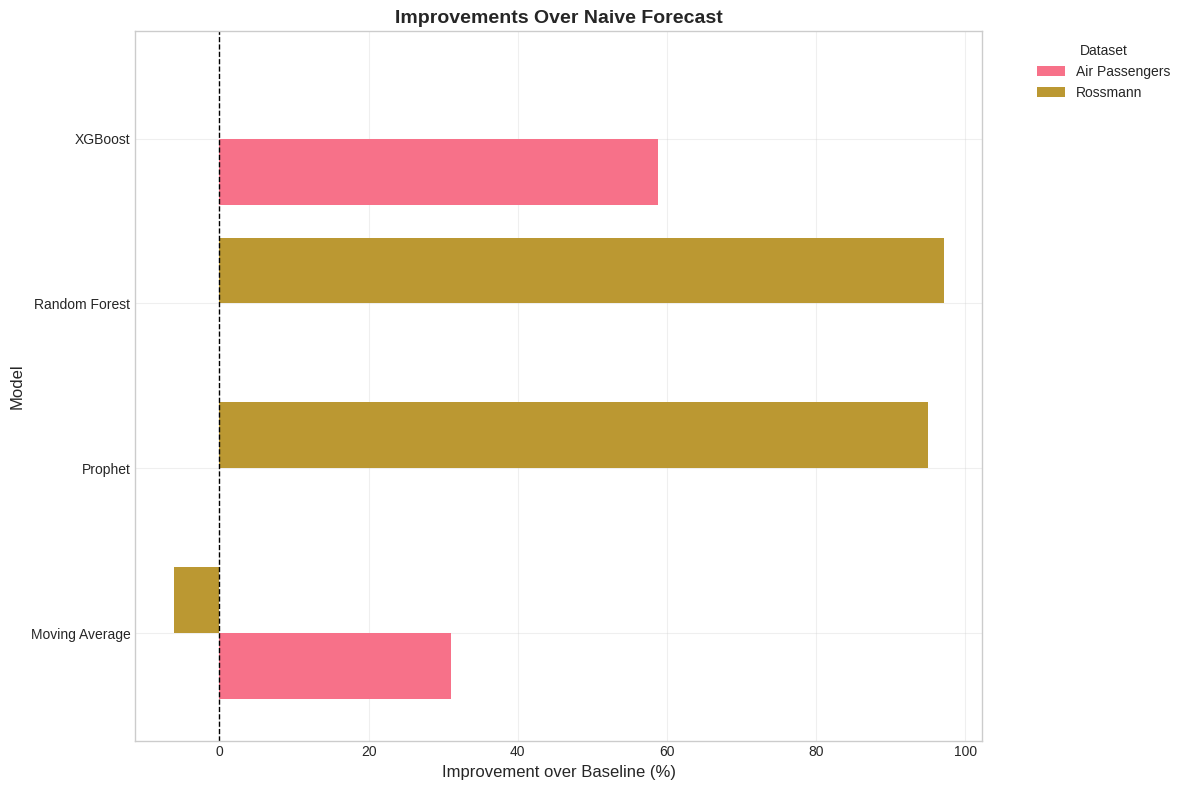

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

💾 Downloaded: baseline_improvement.png


In [14]:
fig = plot_improvement_bars(comparison)
plt.show()
fig.savefig('baseline_improvement.png', dpi=300, bbox_inches='tight')
files.download('baseline_improvement.png')
print("💾 Downloaded: baseline_improvement.png")

## 🔬 Section 9: Statistical Test

In [18]:
# ========================================
# 🔬 Statistical Test (Friedman)
# ========================================

# Get unique models and datasets
models = all_results['model'].unique()
datasets = all_results['dataset'].unique()

print(f"📊 Testing {len(models)} models across {len(datasets)} datasets")
print(f"Models: {list(models)}")
print(f"Datasets: {list(datasets)}")
print()

# Build MAPE matrix - one row per model, one column per dataset
mape_matrix = []
for model in models:
    model_mapes = []
    for dataset in datasets:
        # Get MAPE for this model + dataset combination
        mask = (all_results['model'] == model) & (all_results['dataset'] == dataset)
        mape_values = all_results[mask]['MAPE'].values

        # Check if data exists
        if len(mape_values) > 0:
            model_mapes.append(mape_values[0])
        else:
            print(f"⚠️  Warning: No data for {model} on {dataset}")
            model_mapes.append(np.nan)

    mape_matrix.append(model_mapes)

# Check if we have enough data for the test
if len(datasets) < 3:
    print("⚠️  Note: Friedman test works best with 3+ datasets")
    print("   You currently have only 2 datasets")
    print("   The test will still run, but results may be less reliable")
    print()

# Remove any rows with NaN values
mape_matrix_clean = []
models_clean = []
for i, row in enumerate(mape_matrix):
    if not any(np.isnan(row)):
        mape_matrix_clean.append(row)
        models_clean.append(models[i])

if len(mape_matrix_clean) >= 3:  # Need at least 3 models
    # Perform Friedman test
    stat, p_value = stats.friedmanchisquare(*mape_matrix_clean)

    print("🔬 Friedman Test Results:")
    print(f"Chi-square statistic: {stat:.4f}")
    print(f"P-value: {p_value:.6f}")
    print()

    if p_value < 0.05:
        print("✅ CONCLUSION: Significant differences exist between models (p < 0.05)")
        print("   → Model choice DOES matter for these datasets")
    else:
        print("❌ CONCLUSION: No significant differences found (p >= 0.05)")
        print("   → Models perform similarly across datasets")
else:
    print("❌ Not enough models to run Friedman test")
    print(f"   Need at least 3 models, found {len(mape_matrix_clean)}")
    print("   Skipping statistical test")

📊 Testing 5 models across 2 datasets
Models: ['Naive', 'Moving Average', 'XGBoost', 'Prophet', 'Random Forest']
Datasets: ['Air Passengers', 'Rossmann']

⚠️  Warning: No data for XGBoost on Rossmann
⚠️  Warning: No data for Prophet on Air Passengers
⚠️  Warning: No data for Random Forest on Air Passengers
⚠️  Note: Friedman test works best with 3+ datasets
   You currently have only 2 datasets
   The test will still run, but results may be less reliable

❌ Not enough models to run Friedman test
   Need at least 3 models, found 2
   Skipping statistical test


## 📊 Section 10: Final Summary

In [16]:
summary = all_results.groupby('model').agg({
    'RMSE': ['mean', 'std'],
    'MAE': ['mean', 'std'],
    'MAPE': ['mean', 'std']
}).round(2)

summary.columns = ['_'.join(col) for col in summary.columns]
summary = summary.sort_values('MAPE_mean')

print("📊 Final Summary (Mean ± Std):")
summary

📊 Final Summary (Mean ± Std):


,RMSE_mean,RMSE_std,MAE_mean,MAE_std,MAPE_mean,MAPE_std
model,,,,,,
XGBoost,52.19,NaN,40.55,NaN,8.32,NaN
Random Forest,858957.06,NaN,560148.80,NaN,8.65,NaN
Prophet,1287977.12,NaN,974849.81,NaN,14.77,NaN
Naive,2006180.42,2837035.85,1256046.72,1776203.13,159.91,197.57
Moving Average,1443965.07,2041963.47,987731.79,1396775.53,165.96,215.02


## 💾 Section 11: Download Results

In [17]:
all_results.to_csv('final_comparison.csv', index=False)
comparison.to_csv('baseline_comparison.csv', index=False)
summary.to_csv('summary_statistics.csv')
rank_pivot.to_csv('model_rankings.csv')

files.download('final_comparison.csv')
files.download('baseline_comparison.csv')
files.download('summary_statistics.csv')
files.download('model_rankings.csv')

print("✅ All files downloaded!")
print("📤 Upload to GitHub: results/ folder")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

✅ All files downloaded!
📤 Upload to GitHub: results/ folder
